In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('peridotite')
model_names

['wang_08_per']

# Exploring Pyrrhenious's Peridotite Models Database Correspondence

Here we look at the pervoskite models parameterization correspondence of:

 * Wang et al., 2008. The electrical conductivity of upper-mantle rocks: water content in the upper mantle

Only one model is currently represented by the database.
 
## Wang et al., 2008
 

wang08_per:{10^5.2(0.4) exp( -1.897(0.0933)/kT)}


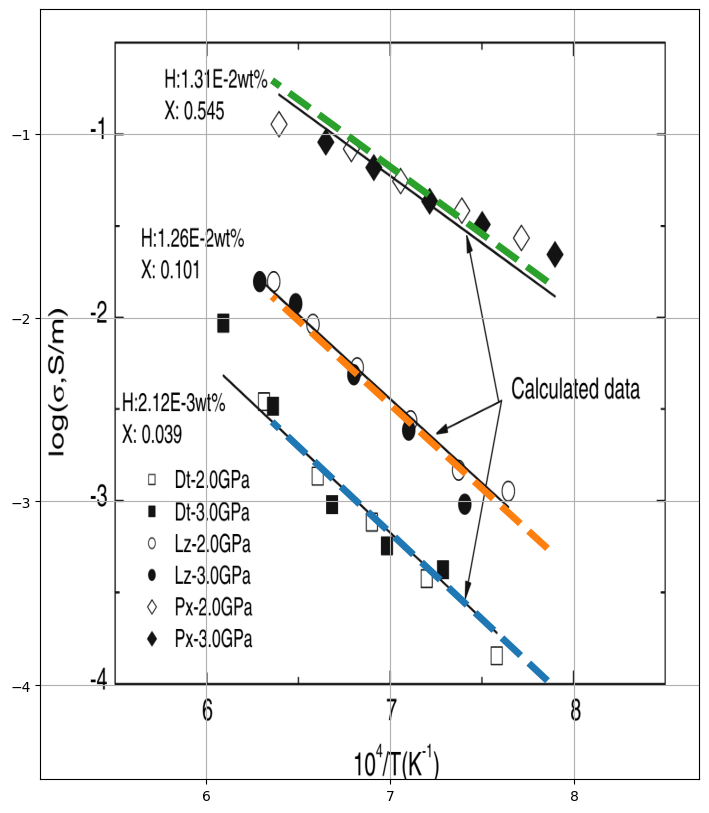

In [2]:
index = 0
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    print(model)
    for water, iron in zip([2.12e-3,1.26e-2,1.31e-2],[0.039,0.101,0.545]):
        conductivity4 = model.get_conductivity(T=temperature_range,Cw=water*1e4,X_fe=iron,P=2)
        ax.plot(1e4/temperature_range,np.log10(conductivity4),linestyle='--',linewidth=5)